In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


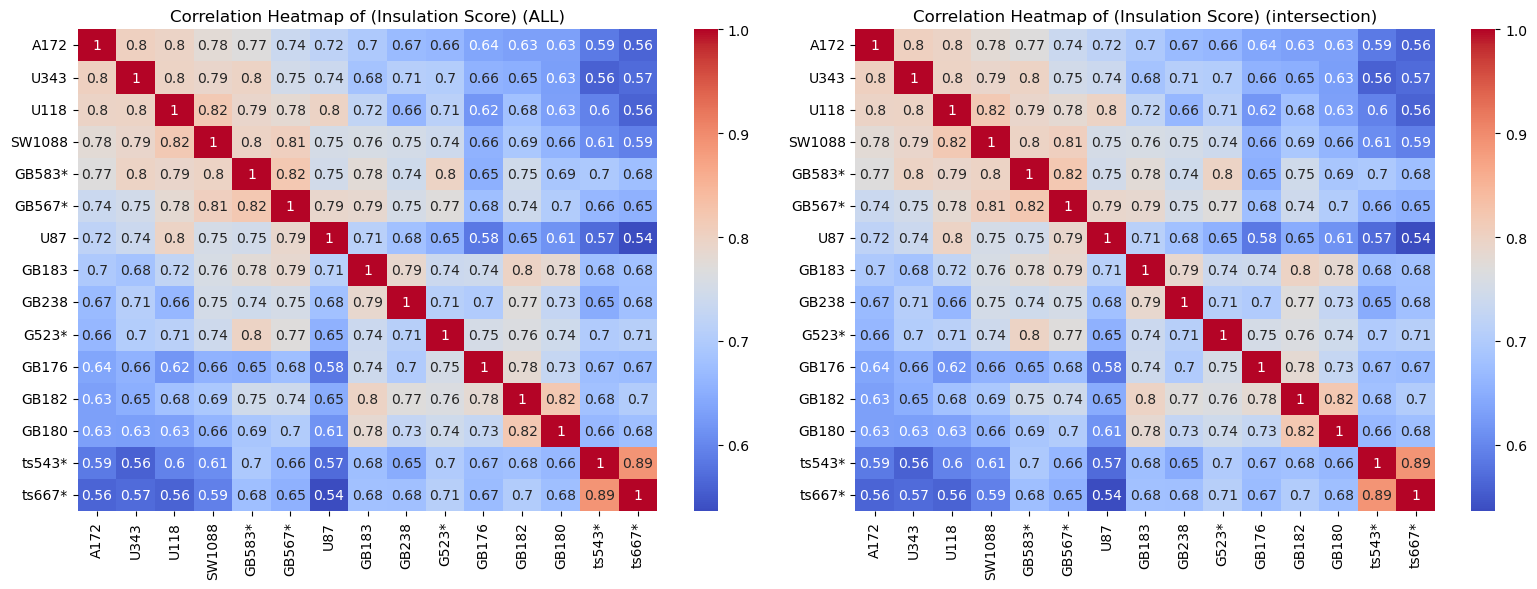

In [6]:
def plot_heatmap_from_txt(txt_file, title_suffix):
    # 读取txt文件
    data = pd.read_csv(txt_file, sep='\s+', header=0)

    # 选取第4到第10列
    selected_data = data.iloc[:, 3:]

    # 计算相关性并将结果存储在 DataFrame 中
    corr_all = selected_data.corr(method='pearson')

    # 删除包含零值的行
    selected_data_no_zeros = selected_data[(selected_data != 0).all(axis=1)]

    # 计算相关性并将结果存储在 DataFrame 中
    corr_no_zeros = selected_data_no_zeros.corr(method='pearson')

    # 按相关性值排序
    sorted_corr_all = corr_all.reindex(corr_all.abs().sort_values(by=corr_all.columns[0], ascending=False).index, axis=0)
    sorted_corr_all = sorted_corr_all.reindex(sorted_corr_all.abs().sort_values(by=sorted_corr_all.columns[0], ascending=False).index, axis=1)

    sorted_corr_no_zeros = corr_no_zeros.reindex(corr_no_zeros.abs().sort_values(by=corr_no_zeros.columns[0], ascending=False).index, axis=0)
    sorted_corr_no_zeros = sorted_corr_no_zeros.reindex(sorted_corr_no_zeros.abs().sort_values(by=sorted_corr_no_zeros.columns[0], ascending=False).index, axis=1)

    # 绘制热图
    plt.figure(figsize=(16, 6))

    # 绘制左图：所有行的热图
    plt.subplot(1, 2, 1)
    sns.heatmap(sorted_corr_all, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap of ({title_suffix}) (ALL)')

    # 绘制右图：第4到第10列都没有零值的行之间的相关性热图
    plt.subplot(1, 2, 2)
    sns.heatmap(sorted_corr_no_zeros, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap of ({title_suffix}) (intersection)')

    plt.tight_layout()
    plt.show()

# 读取txt文件并绘制热图，标题后缀为“(ALL)”
plot_heatmap_from_txt('/cluster/home/futing/Project/GBM/HiC/09insulation/cooltools_insulation/IS_GBMsample2.txt', 'Insulation Score')



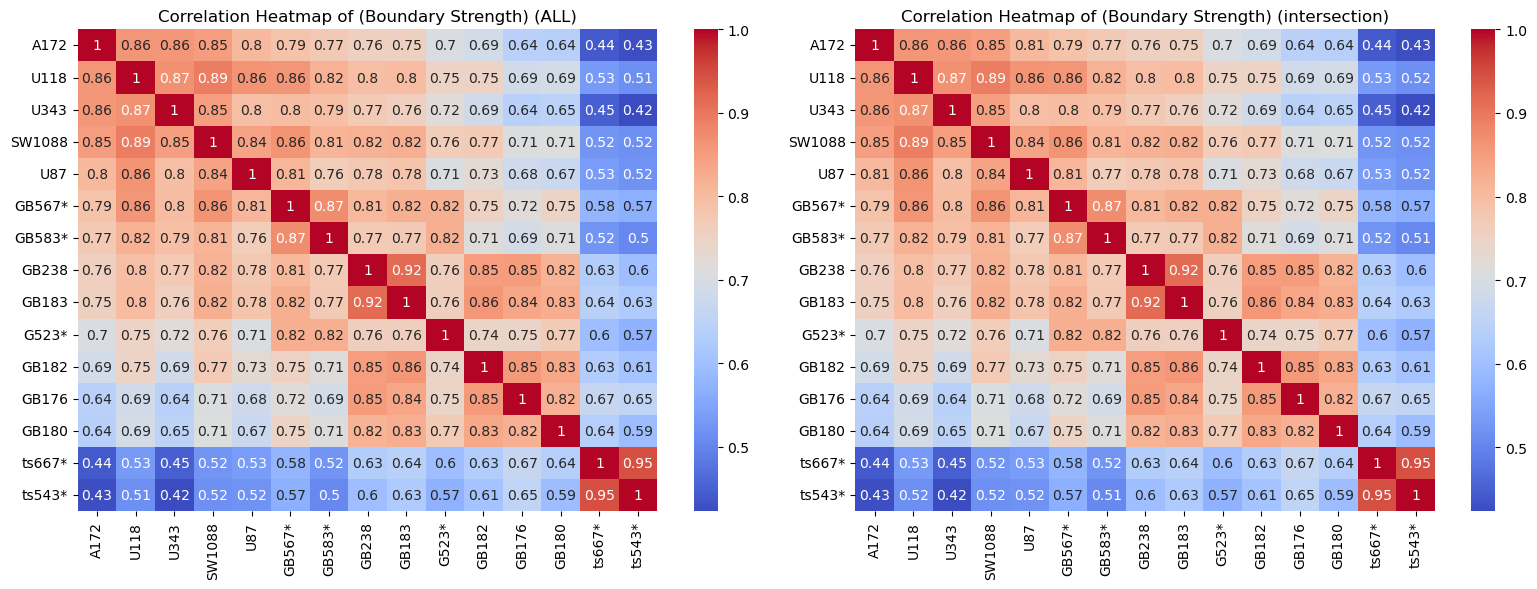

In [7]:
plot_heatmap_from_txt('/cluster/home/futing/Project/GBM/HiC/09insulation/cooltools_insulation/BS_GBMsample2.txt', 'Boundary Strength')


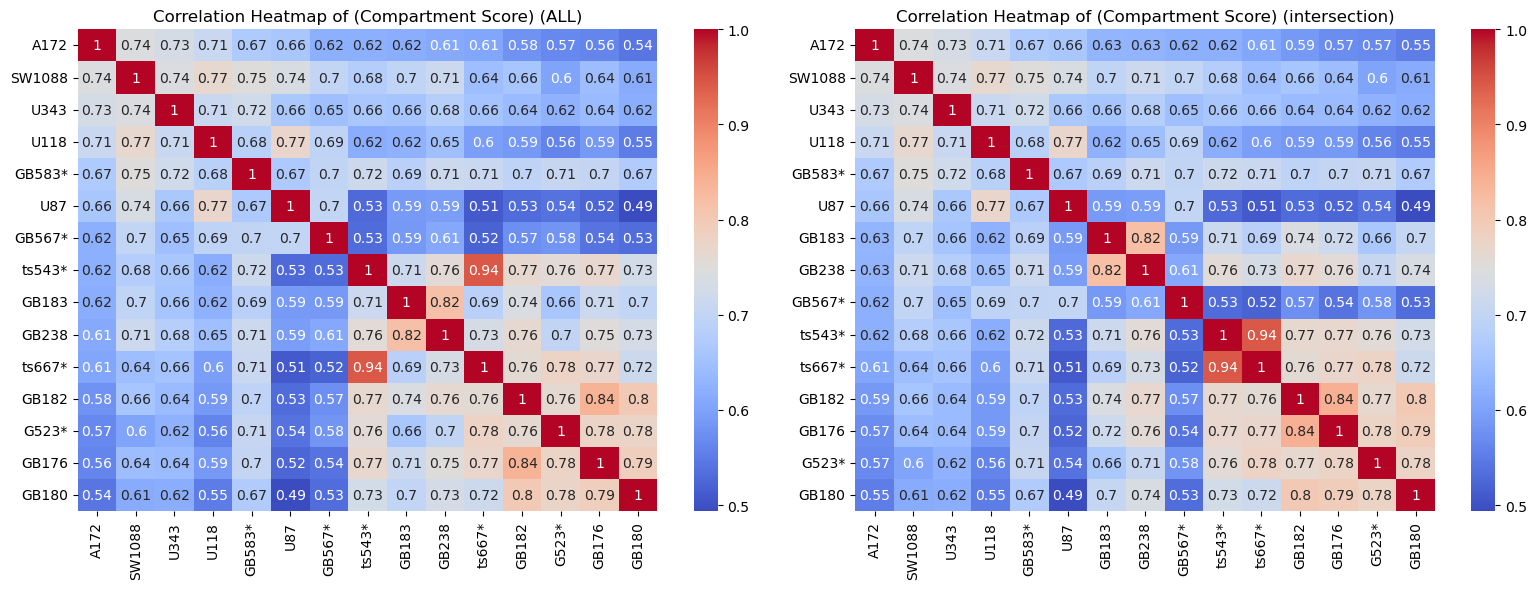

In [8]:
plot_heatmap_from_txt('/cluster/home/futing/Project/GBM/HiC/06compartment/cooltools/cooltool_new/E1_GBMsample2.txt', 'Compartment Score')

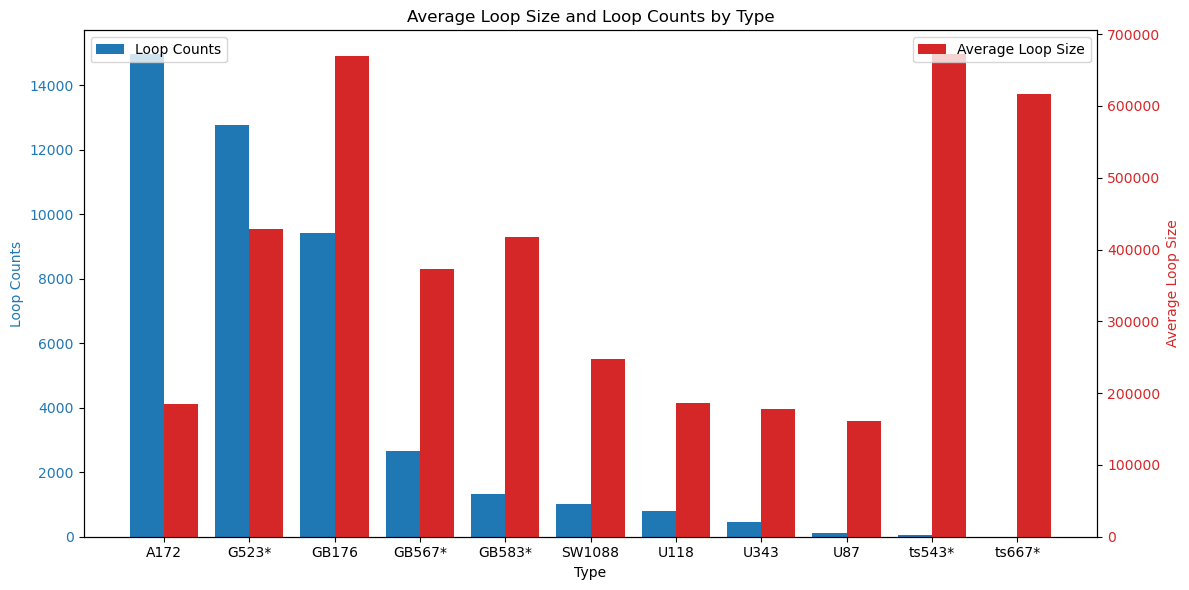

In [14]:
# 读取数据
data = pd.read_csv("/cluster/home/futing/Project/GBM/HiC/10loop/mustache/GBMsample_merge_loop_size.txt", sep="\t", header=None, names=["Type", "Chromosome", "LoopSize"])

# 定义类型名称的映射关系
type_mapping = {
    "GBM_common": "DGC",
    "GBMstem": "GSC",
    "ipsc": "iPSC",
    "NPC": "NPC",
    "GBMmerge": "GBMmerge",
    "pHGG": "pHGG"
}

# 替换类型名称
data['Type'] = data['Type'].replace(type_mapping)

# 计算每种类型的平均环大小和环计数
average_loop_size = data.groupby('Type')['LoopSize'].mean()
type_counts = data['Type'].value_counts()

# 创建画布
fig, ax1 = plt.subplots(figsize=(12, 6))

# 设置第一个坐标轴的颜色和标签
color1 = 'tab:blue'
ax1.set_xlabel('Type')
ax1.set_ylabel('Loop Counts', color=color1)
ax1.bar(np.arange(len(type_counts)) - 0.2, type_counts, width=0.4, color=color1, label='Loop Counts')
ax1.tick_params(axis='y', labelcolor=color1)

# 设置第二个坐标轴
ax2 = ax1.twinx()

# 设置第二个坐标轴的颜色和标签
color2 = 'tab:red'
ax2.set_ylabel('Average Loop Size', color=color2)
ax2.bar(np.arange(len(average_loop_size)) + 0.2, average_loop_size, width=0.4, color=color2, label='Average Loop Size')
ax2.tick_params(axis='y', labelcolor=color2)

# 设置x轴刻度标签
plt.xticks(np.arange(len(average_loop_size)), average_loop_size.index, rotation=45)

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 添加标题
plt.title('Average Loop Size and Loop Counts by Type')

# 显示图形
plt.tight_layout()
plt.show()


In [ ]:
# 按照 average loop size 大小排序
average_loop_size_sorted = average_loop_size.sort_values(ascending=False)
type_counts_ratio_sorted = type_counts_ratio[average_loop_size_sorted.index]

# 创建画布
fig, ax1 = plt.subplots(figsize=(12, 6))

# 设置第一个坐标轴的颜色和标签
color1 = 'tab:blue'
ax1.set_xlabel('Type')
ax1.set_ylabel('Loop Counts/Contact counts', color=color1)
ax1.bar(np.arange(len(type_counts_ratio_sorted)) - 0.2, type_counts_ratio_sorted, width=0.4, color=color1, label='Loop Counts/Contact counts')
ax1.tick_params(axis='y', labelcolor=color1)

# 设置第二个坐标轴
ax2 = ax1.twinx()

# 设置第二个坐标轴的颜色和标签
color2 = 'tab:red'
ax2.set_ylabel('Average Loop Size', color=color2)
ax2.bar(np.arange(len(average_loop_size_sorted)) + 0.2, average_loop_size_sorted, width=0.4, color=color2, label='Average Loop Size')
ax2.tick_params(axis='y', labelcolor=color2)

# 设置x轴刻度标签
plt.xticks(np.arange(len(average_loop_size_sorted)), average_loop_size_sorted.index, rotation=45)

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 添加标题
plt.title('Average Loop Size and Loop Counts by Type (Sorted by Average Loop Size)')

# 显示图形
plt.tight_layout()
plt.show()


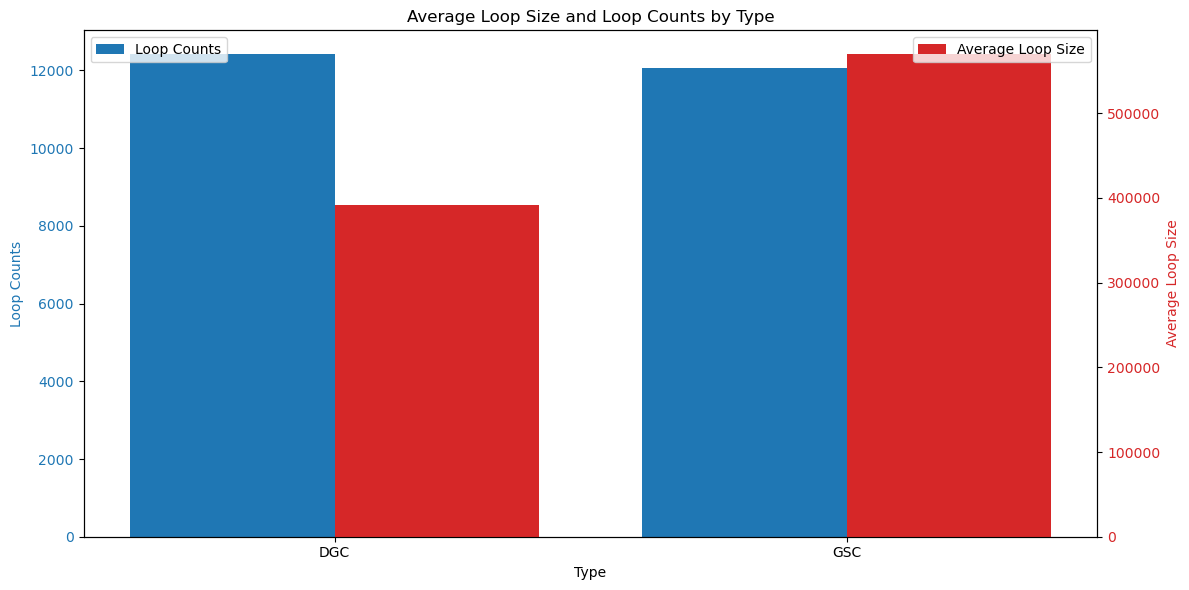

In [8]:
# 读取数据
data = pd.read_csv("/cluster/home/futing/Project/GBM/HiC/10loop/mustache/DGCvsGSC_loop_size.txt", sep="\t", header=None, names=["Type", "Chromosome", "LoopSize"])

# 定义类型名称的映射关系
type_mapping = {
    "DGC": "DGC",
    "GSC": "GSC"
}

# 替换类型名称
data['Type'] = data['Type'].replace(type_mapping)

# 计算每种类型的平均环大小和环计数
average_loop_size = data.groupby('Type')['LoopSize'].mean()
type_counts = data['Type'].value_counts()

# 创建画布
fig, ax1 = plt.subplots(figsize=(12, 6))

# 设置第一个坐标轴的颜色和标签
color1 = 'tab:blue'
ax1.set_xlabel('Type')
ax1.set_ylabel('Loop Counts', color=color1)
ax1.bar(np.arange(len(type_counts)) - 0.2, type_counts, width=0.4, color=color1, label='Loop Counts')
ax1.tick_params(axis='y', labelcolor=color1)

# 设置第二个坐标轴
ax2 = ax1.twinx()

# 设置第二个坐标轴的颜色和标签
color2 = 'tab:red'
ax2.set_ylabel('Average Loop Size', color=color2)
ax2.bar(np.arange(len(average_loop_size)) + 0.2, average_loop_size, width=0.4, color=color2, label='Average Loop Size')
ax2.tick_params(axis='y', labelcolor=color2)

# 设置x轴刻度标签
plt.xticks(np.arange(len(average_loop_size)), average_loop_size.index, rotation=45)

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 添加标题
plt.title('Average Loop Size and Loop Counts by Type')

# 显示图形
plt.tight_layout()
plt.show()


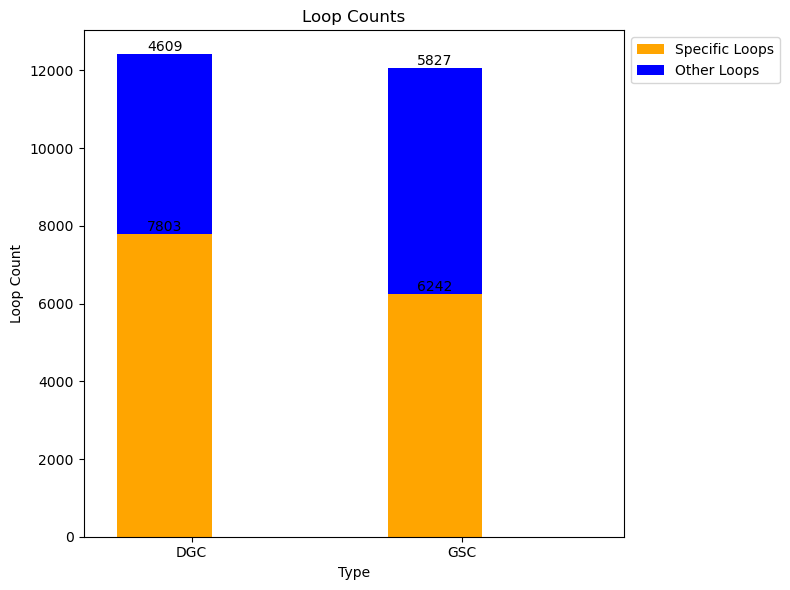

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 函数用于计算文件的行数
def count_lines(filename):
    with open(filename, 'r') as file:
        return sum(1 for line in file)

# 文件路径
file_dir = "/cluster/home/futing/Project/GBM/HiC/10loop/mustache/"
loop1_dgc_file = file_dir + "DGCvsGSC.loop1"
loop2_gsc_file = file_dir + "DGCvsGSC.loop2"
diffloop1_dgc_file = file_dir + "DGCvsGSC.diffloop1"
diffloop2_gsc_file = file_dir + "DGCvsGSC.diffloop2"

# 计算每个文件的行数
loop1_dgc_count = count_lines(loop1_dgc_file)
loop2_gsc_count = count_lines(loop2_gsc_file)
diffloop1_dgc_count = count_lines(diffloop1_dgc_file)
diffloop2_gsc_count = count_lines(diffloop2_gsc_file)

# 计算other loop数
other_loop_dgc = loop1_dgc_count - diffloop1_dgc_count
other_loop_gsc = loop2_gsc_count - diffloop2_gsc_count

# 设置柱形图的宽度
bar_width = 0.35

# 设置柱形图的位置
indices = np.arange(2)

# 绘制堆叠柱形图
plt.figure(figsize=(8, 6))
bars1 = plt.bar(indices - 0.2, [diffloop1_dgc_count, diffloop2_gsc_count], bar_width, label='Specific Loops', color='orange')
bars2 = plt.bar(indices - 0.2, [other_loop_dgc, other_loop_gsc], bar_width, bottom=[diffloop1_dgc_count, diffloop2_gsc_count], label='Other Loops', color='blue')

# 在柱子上方添加具体数字
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bars1[i].get_height(), str(int(bar.get_height())), ha='center', va='bottom')

# 添加标签和标题
plt.xlabel('Type')
plt.ylabel('Loop Count')
plt.title('Loop Counts')
plt.xticks(indices - 0.1, ['DGC', 'GSC'])  # 调整柱子位置
plt.xlim(-0.5, 1.5)  # 调整 x 轴范围

# 放置图例在右上角
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# 显示图形
plt.tight_layout()
plt.show()
